<a href="https://colab.research.google.com/github/rubbims/TareaCalificada3/blob/main/TareaCalificada3_Grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea Calificada 3**
**Grupo 8**

1. JORDÁN ALVARADO, GUILLERMO SEBASTIAN - 20244659
2. PFOCCO DAVALOS, JOSUE - 20191946
3. MOCHCCO SANCA, RUBY - 20143018

# **Primero: Integre los archivos que están el folder comprimido (appendData.zip)**

In [35]:
# link del repositorio
dataRepo='https://github.com/rubbims/TareaCalificada3/tree/main/appendData'

In [36]:
#urls de los archivos en appenData
# primero creamos los nombres
# luego creamos los urls
levels = range(1, 5)
levelNames = ['level' + str(level) + '.xlsx' for level in levels]
appenDataLinks = [dataRepo + fn for fn in levelNames]


In [37]:
import pandas as pd
import requests
from io import BytesIO

# link del repositorio
dataRepo = "https://github.com/rubbims/TareaCalificada3/raw/main/appendData/"

# Generar nombres Level 1 al 4
levels = range(1, 5)
levelNames = ['level' + str(level) + '.xlsx' for level in levels]

# Generar links para los level 1 al 4
appendDataLinks = [dataRepo + fn for fn in levelNames]

# Lista vacía donde estarán nuestro Dfs
level = []

# Iterando para cada link: descargar, leer y guardar en la lista allDfs
for link in appendDataLinks:
    # descargar
    response = requests.get(link)

    # leer
    appen_data = pd.read_excel(BytesIO(response.content))

    # append
    level.append(appen_data)

# Now level contains all DataFrames from the Excel files

In [39]:
level
#vemos que en general de level 2 al 4 son similares, pero el level 1 tienen algo diferente en las primeras filas

[   Unnamed: 0 Table 1. Human Development Index and its components   \
 0         NaN                                                NaN     
 1         NaN                                                NaN     
 2         NaN                                                NaN     
 3    HDI rank                                            Country     
 4         NaN                                                NaN     
 ..        ...                                                ...     
 67         62                                           Malaysia     
 68         63                                            Georgia     
 69         63                                          Mauritius     
 70         63                                             Serbia     
 71         66                                           Thailand     
 
                         Unnamed: 2  Unnamed: 3                Unnamed: 4  \
 0                              NaN         NaN                      

In [40]:
#eliminamos las filas que no nos importan y hacemos que
level[0].drop([0,1,2], axis=0, inplace=True) #no nos sirve
level[0] =  level[0].reset_index() #reordenamos los índices de la fila
level[0].drop('index', axis=1, inplace=True)

desarrollo = ['VERY HIGH HUMAN DEVELOPMENT', 'HIGH HUMAN DEVELOPMENT', 'MEDIUM HUMAN DEVELOPMENT', 'LOW HUMAN DEVELOPMENT']

for i in range(len(level)):
  if i == 0 :
      level[i] = level[i].applymap(lambda x: str(x).strip() if isinstance(x, str) else x) #quitamos espacios al inicio y final
      # Unir los valores de las celdas entre las dos filas
      for j in range(3):
        level[i].iloc[j] = level[i].iloc[j].fillna('')

      #Unimos los tres datos que necesitamos para identificar la columna, título, año y tipo
      columna = [f'{a}_{b}_{c}' for a, b, c in zip(level[i].iloc[0], level[i].iloc[1], level[i].iloc[2])]
      #procesamiento para que quede presentable
      columna = list(map(lambda x:x.replace(' ', '_'), columna))
      columna = list(map(lambda x: x[:-2] if x[(len(x)-2):(len(x)-1)]=='_' else x, columna))

      level[i].columns = columna  # ponemos la fila nueva como nombre de las columnas
      #eliminamos lo que no necesitamos
      level[i].drop([0,1,2], axis=0, inplace=True)
      level[i].drop('', axis=1, inplace=True)
      level[i].drop('_', axis=1, inplace=True)

      #agregamos el tipo de desarrollo que tiene
      level[i]['Development'] = desarrollo[i]

  else:
      level[i].drop([0,1], axis=0, inplace=True)
      #quitamos aquellas columnas que empiecen con 'Unnamed'
      level[i] = level[i].loc[:, ~level[i].columns.str.startswith('Unnamed')]
      level[i].columns = level[0].columns[:-1] #mantenemos el nombre de las columnas para luego concatenarlos

      level[i] =  level[i].reset_index() #reordenamos los índices de la fila
      level[i].drop('index', axis=1, inplace=True)

      level[i]['Development'] = desarrollo[i] #agregamos el tipo de desarrollo que tiene


In [ ]:
#level[3]

In [41]:
level_concatenado = pd.concat(level, ignore_index=True)
level_concatenado['Country'] = level_concatenado['Country'].str.lower()
level_concatenado

,HDI_rank,Country,Human_Development_Index_(HDI)_Value_2021,Life_expectancy_at_birth_(years)_2021,Expected_years_of_schooling_(years)_2021,Mean_years_of_schooling_(years)_2021,Gross_national_income_(GNI)_per_capita_(2017_PPP_$)_2021,GNI_per_capita_rank_minus_HDI_rank__2021,HDI_rank__2020,Development
0,1,switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5,3,VERY HIGH HUMAN DEVELOPMENT
1,2,norway,0.961,83.2339,18.1852,13.00363,64660.10622,6,1,VERY HIGH HUMAN DEVELOPMENT
2,3,iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11,2,VERY HIGH HUMAN DEVELOPMENT
3,4,"hong kong, china (sar)",0.952,85.4734,17.27817,12.22621,62606.8454,6,4,VERY HIGH HUMAN DEVELOPMENT
4,5,australia,0.951,84.5265,21.05459,12.72682,49238.43335,18,5,VERY HIGH HUMAN DEVELOPMENT
...,...,...,...,...,...,...,...,...,...,...
184,187,burundi,0.426,61.6627,10.722722,3.129267,731.786709,4,NaN,LOW HUMAN DEVELOPMENT
185,188,central african republic,0.404,53.8947,8.040172,4.334,966.058611,1,NaN,LOW HUMAN DEVELOPMENT
186,189,niger,0.4,61.5763,6.957112,2.116717,1239.866936,-3,NaN,LOW HUMAN DEVELOPMENT
187,190,chad,0.394,52.5254,8.035914,2.573774,1364.169417,-7,NaN,LOW HUMAN DEVELOPMENT


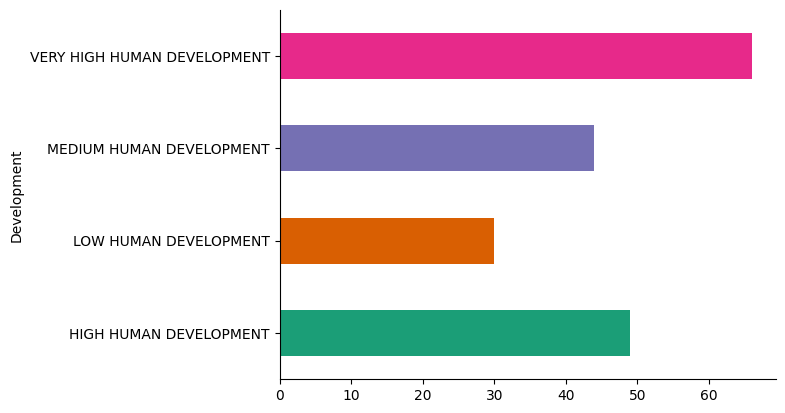

In [42]:
# Vemos la info resumida de manera rápida

from matplotlib import pyplot as plt
import seaborn as sns
level_concatenado.groupby('Development').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Segundo: Cuando haya integrado los archivos anteriores, haga un merge entre ese archivo, y el archivo countryCODES.xlsx.**

In [44]:
import pandas as pd
import requests
from io import BytesIO
import pandas as pd

# URL del countryCODES
dataRepo2 = "https://github.com/rubbims/TareaCalificada3/raw/main/countryCODES.xlsx"

# Read the Excel file into a DataFrame
countryCODES = pd.read_excel(dataRepo2)
countryCODES['Country'] = countryCODES['Country'].str.lower()
countryCODES

,Country,Officialstatename,InternetccTLD,iso2,iso3
0,afghanistan,The Islamic Republic of Afghanistan,.af,AF,AFG
1,albania,The Republic of Albania,.al,AL,ALB
2,algeria,The People's Democratic Republic of Algeria,.dz,DZ,DZA
3,angola,The Republic of Angola,.ao,AO,AGO
4,antigua and barbuda,Antigua and Barbuda,.ag,AG,ATG
...,...,...,...,...,...
166,uzbekistan,The Republic of Uzbekistan,.uz,UZ,UZB
167,viet nam,The Socialist Republic of Viet Nam,.vn,VN,VNM
168,yemen,The Republic of Yemen,.ye,YE,YEM
169,zambia,The Republic of Zambia,.zm,ZM,ZMB


El merge lo haremos tomando como atributo común al 'Country'. Mostraremos todos los atributos de la primera tabla para ver cuál se queda sin código, en caso haya, para eso hacemos left join. Con esto podremos ver si necesitamos hacer más procesamiento en las tablas y así todos los países coincidan

In [45]:
prueba = pd.merge(level_concatenado, countryCODES, on='Country', how = 'left')
prueba

,HDI_rank,Country,Human_Development_Index_(HDI)_Value_2021,Life_expectancy_at_birth_(years)_2021,Expected_years_of_schooling_(years)_2021,Mean_years_of_schooling_(years)_2021,Gross_national_income_(GNI)_per_capita_(2017_PPP_$)_2021,GNI_per_capita_rank_minus_HDI_rank__2021,HDI_rank__2020,Development,Officialstatename,InternetccTLD,iso2,iso3
0,1,switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5,3,VERY HIGH HUMAN DEVELOPMENT,The Swiss Confederation,.ch,CH,CHE
1,2,norway,0.961,83.2339,18.1852,13.00363,64660.10622,6,1,VERY HIGH HUMAN DEVELOPMENT,The Kingdom of Norway,.no,NO,NOR
2,3,iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11,2,VERY HIGH HUMAN DEVELOPMENT,Iceland,.is,IS,ISL
3,4,"hong kong, china (sar)",0.952,85.4734,17.27817,12.22621,62606.8454,6,4,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN
4,5,australia,0.951,84.5265,21.05459,12.72682,49238.43335,18,5,VERY HIGH HUMAN DEVELOPMENT,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,187,burundi,0.426,61.6627,10.722722,3.129267,731.786709,4,NaN,LOW HUMAN DEVELOPMENT,The Republic of Burundi,.bi,BI,BDI
185,188,central african republic,0.404,53.8947,8.040172,4.334,966.058611,1,NaN,LOW HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN
186,189,niger,0.4,61.5763,6.957112,2.116717,1239.866936,-3,NaN,LOW HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN
187,190,chad,0.394,52.5254,8.035914,2.573774,1364.169417,-7,NaN,LOW HUMAN DEVELOPMENT,The Republic of Chad,.td,TD,TCD


In [48]:
!pip install thefuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.2 MB/s eta 0:00:00


In [49]:
paises_level = set(level_concatenado['Country'])
paises_cCODES = set(countryCODES['Country'])
no_comun_level = paises_level - paises_cCODES
no_comun_Codes = paises_cCODES - paises_level
#no_comun_level

In [50]:
from thefuzz import process as fz

[(c,fz.extractOne(c,no_comun_level )) for c in sorted(no_comun_Codes)]
#nos vamos a quedar con todas las coincidencias dado que son muy similares entre sí

[('bahamas (the)', ('bahamas', 90)),
 ('central african republic (the)', ('central african republic', 95)),
 ('comoros (the)', ('comoros', 90)),
 ('congo (the democratic republic of the)',
  ('congo (democratic republic of the)', 95)),
 ('congo (the)', ('congo', 90)),
 ("c√îte d'ivoire", ("côte d'ivoire", 96)),
 ('dominican republic (the)', ('dominican republic', 95)),
 ('eswatini', ('eswatini (kingdom of)', 90)),
 ('gambia (the)', ('gambia', 90)),
 ('korea (the republic of)', ('korea (republic of)', 95)),
 ("lao people's democratic republic (the)",
  ("lao people's democratic republic", 95)),
 ('moldova (the republic of)', ('moldova (republic of)', 95)),
 ('netherlands (the)', ('netherlands', 95)),
 ('niger (the)', ('niger', 90)),
 ('pakistan', ('sudan', 60)),
 ('philippines (the)', ('philippines', 95)),
 ('russian federation (the)', ('russian federation', 95)),
 ('sudan (the)', ('sudan', 90)),
 ('tanzania, the united republic of', ('syrian arab republic', 86)),
 ('turkey', ('türkiye'

In [51]:
changesC={c:fz.extractOne(c, no_comun_level)[0]
                 for c in sorted(no_comun_Codes)
                 if fz.extractOne(c, no_comun_level)[1] >65}
#dict of matches
#changesC

countryCODES.replace(to_replace={'Country':changesC},inplace=True)
# countryCODES

Lo que nos lleva finalmente a la tabla a continuación. Los campos que siguen en blanco es porque simplemente ya no tienen un código asignado. A criterio del analista se puede crear las llaves faltantes, quitar esos campos con el inner join, dejarlo en blanco con el left join, entre otros. En nuestro caso caso optaremos por esto último

In [52]:
level_and_codes = pd.merge(level_concatenado, countryCODES, on='Country', how = 'left')
level_and_codes

,HDI_rank,Country,Human_Development_Index_(HDI)_Value_2021,Life_expectancy_at_birth_(years)_2021,Expected_years_of_schooling_(years)_2021,Mean_years_of_schooling_(years)_2021,Gross_national_income_(GNI)_per_capita_(2017_PPP_$)_2021,GNI_per_capita_rank_minus_HDI_rank__2021,HDI_rank__2020,Development,Officialstatename,InternetccTLD,iso2,iso3
0,1,switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,5,3,VERY HIGH HUMAN DEVELOPMENT,The Swiss Confederation,.ch,CH,CHE
1,2,norway,0.961,83.2339,18.1852,13.00363,64660.10622,6,1,VERY HIGH HUMAN DEVELOPMENT,The Kingdom of Norway,.no,NO,NOR
2,3,iceland,0.959,82.6782,19.163059,13.76717,55782.04981,11,2,VERY HIGH HUMAN DEVELOPMENT,Iceland,.is,IS,ISL
3,4,"hong kong, china (sar)",0.952,85.4734,17.27817,12.22621,62606.8454,6,4,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN
4,5,australia,0.951,84.5265,21.05459,12.72682,49238.43335,18,5,VERY HIGH HUMAN DEVELOPMENT,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,187,burundi,0.426,61.6627,10.722722,3.129267,731.786709,4,NaN,LOW HUMAN DEVELOPMENT,The Republic of Burundi,.bi,BI,BDI
185,188,central african republic,0.404,53.8947,8.040172,4.334,966.058611,1,NaN,LOW HUMAN DEVELOPMENT,The Central African Republic,.cf,CF,CAF
186,189,niger,0.4,61.5763,6.957112,2.116717,1239.866936,-3,NaN,LOW HUMAN DEVELOPMENT,The Republic of the Niger,.ne,NE,NER
187,190,chad,0.394,52.5254,8.035914,2.573774,1364.169417,-7,NaN,LOW HUMAN DEVELOPMENT,The Republic of Chad,.td,TD,TCD


# **Tercero: Con los archivos fallecidosCOVID.csv,  haga un reporte mensual de fallecidos. Solo debe mostrar por fila el mes (y año) y cuanto fallecidos hubo en ese mes.**

In [53]:
!pip install pandas

In [55]:
# Url del fallecidosCOVID csv
dataRepo3 = "https://github.com/rubbims/TareaCalificada3/raw/main/fallecidosCOVID.csv"

# Read the CSV file into a DataFrame
deadCovid = pd.read_csv(dataRepo3, delimiter=';')

# Display the DataFrame
print(deadCovid)

        FECHA_CORTE  FECHA_FALLECIMIENTO  EDAD_DECLARADA       SEXO  \
0          20240317             20220219              63  MASCULINO   
1          20240317             20210529              74  MASCULINO   
2          20240317             20210623              72   FEMENINO   
3          20240317             20210824              85  MASCULINO   
4          20240317             20210627              46  MASCULINO   
...             ...                  ...             ...        ...   
220913     20240317             20200809              77  MASCULINO   
220914     20240317             20201028              81  MASCULINO   
220915     20240317             20200515              68   FEMENINO   
220916     20240317             20210414              66   FEMENINO   
220917     20240317             20200819              61  MASCULINO   

                            CLASIFICACION_DEF DEPARTAMENTO PROVINCIA  \
0                         Criterio virológico       TUMBES    TUMBES   
1  

In [56]:
deadCovid['FECHA_FALLECIMIENTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220918 entries, 0 to 220917
Series name: FECHA_FALLECIMIENTO
Non-Null Count   Dtype
--------------   -----
220918 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [57]:
#se convierte el formato de la columna fecha de fallecimiento a typo datetime
deadCovid['FECHA_FALLECIMIENTO'] = pd.to_datetime(deadCovid['FECHA_FALLECIMIENTO'], format='%Y%m%d')

In [58]:
deadCovid['FECHA_FALLECIMIENTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220918 entries, 0 to 220917
Series name: FECHA_FALLECIMIENTO
Non-Null Count   Dtype         
--------------   -----         
220918 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [59]:
deadCovid


,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
...,...,...,...,...,...,...,...,...,...,...
220913,20240317,2020-08-09,77,MASCULINO,Criterio radiológico,AREQUIPA,AREQUIPA,ALTO SELVA ALEGRE,40102.0,NaN
220914,20240317,2020-10-28,81,MASCULINO,Criterio clínico,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101.0,NaN
220915,20240317,2020-05-15,68,FEMENINO,Criterio SINADEF,LIMA,LIMA,LA MOLINA,150114.0,NaN
220916,20240317,2021-04-14,66,FEMENINO,Criterio clínico,LIMA,LIMA,LOS OLIVOS,150117.0,NaN


In [60]:
deadCovidCopy=deadCovid
deadCovidCopy

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
...,...,...,...,...,...,...,...,...,...,...
220913,20240317,2020-08-09,77,MASCULINO,Criterio radiológico,AREQUIPA,AREQUIPA,ALTO SELVA ALEGRE,40102.0,NaN
220914,20240317,2020-10-28,81,MASCULINO,Criterio clínico,LAMBAYEQUE,CHICLAYO,CHICLAYO,140101.0,NaN
220915,20240317,2020-05-15,68,FEMENINO,Criterio SINADEF,LIMA,LIMA,LA MOLINA,150114.0,NaN
220916,20240317,2021-04-14,66,FEMENINO,Criterio clínico,LIMA,LIMA,LOS OLIVOS,150117.0,NaN


In [61]:
#se extrae el mes y año de cada de fecha de fallecimiento de la dataframe
deadCovidCopy['year'] = deadCovidCopy['FECHA_FALLECIMIENTO'].dt.year
deadCovidCopy['month'] = deadCovidCopy['FECHA_FALLECIMIENTO'].dt.month

In [62]:
#se hace un conteo de las personas basada en las coincidencias en cada mes y año
year_month_counts = deadCovidCopy.groupby(['year', 'month']).size().reset_index(name='count')
#cada mes en escrito de forma numero se convierte a letra
#year_month_counts_2 = year_month_counts
#year_month_counts_2['month'] = year_month_counts_2['month'].apply(lambda x: pd.Timestamp(month=x, day=1, year=2021).strftime('%B'))

In [63]:
#respuesta del punto 3
year_month_counts

,year,month,count
0,2020,3,181
1,2020,4,5134
2,2020,5,16363
3,2020,6,17462
4,2020,7,18501
5,2020,8,17668
6,2020,9,8437
7,2020,10,4471
8,2020,11,3229
9,2020,12,3885


# **Cuarto: Use el mismo archivo anterior. Esta vez haga un reporte de fallecidos por mes, pero el tipo de muerte debe estar en columnas separadas.**

In [64]:
#actividad 4
#a lo anteriormente hecho, se agrega la columna clasificacion de defuncion
plus_defuncion = pd.merge(year_month_counts, deadCovidCopy[['year', 'month', 'CLASIFICACION_DEF']], on=['year', 'month'])

In [65]:
plus_defuncion

,year,month,count,CLASIFICACION_DEF
0,2020,3,181,Criterio clínico
1,2020,3,181,Criterio virológico
2,2020,3,181,Criterio investigación Epidemiológica
3,2020,3,181,Criterio clínico
4,2020,3,181,Criterio serológico
...,...,...,...,...
220913,2024,2,62,NotiCovid
220914,2024,2,62,Criterio virológico
220915,2024,2,62,Criterio virológico
220916,2024,3,2,Criterio virológico


In [66]:
#como en lo anterior se visualiza que para un mismo mes y año corresponder diferentes clasif def
#entonces se agrega columnas para cada tipo de muerte
plus_defuncion = pd.get_dummies(plus_defuncion, columns=['CLASIFICACION_DEF'], prefix='', prefix_sep='')

In [67]:
plus_defuncion

,year,month,count,Criterio SINADEF,Criterio clínico,Criterio investigación Epidemiológica,Criterio nexo epidemiológico,Criterio radiológico,Criterio serológico,Criterio virológico,NotiCovid,sinadef
0,2020,3,181,False,True,False,False,False,False,False,False,False
1,2020,3,181,False,False,False,False,False,False,True,False,False
2,2020,3,181,False,False,True,False,False,False,False,False,False
3,2020,3,181,False,True,False,False,False,False,False,False,False
4,2020,3,181,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
220913,2024,2,62,False,False,False,False,False,False,False,True,False
220914,2024,2,62,False,False,False,False,False,False,True,False,False
220915,2024,2,62,False,False,False,False,False,False,True,False,False
220916,2024,3,2,False,False,False,False,False,False,True,False,False


In [68]:
# Luego, se procede a agrupar los datos por mes y año, para sumar el número de fallecidos
# en cada tipo de muerte en su respectiva fecha
plus_defuncion_2 = plus_defuncion.groupby(['year', 'month']).sum().reset_index()
plus_defuncion_2

,year,month,count,Criterio SINADEF,Criterio clínico,Criterio investigación Epidemiológica,Criterio nexo epidemiológico,Criterio radiológico,Criterio serológico,Criterio virológico,NotiCovid,sinadef
0,2020,3,32761,35,52,25,2,7,2,58,0,0
1,2020,4,26357956,1793,541,498,68,182,778,1274,0,0
2,2020,5,267747769,6826,1152,1427,203,480,3233,3042,0,0
3,2020,6,304921444,5722,670,1706,251,391,5605,3117,0,0
4,2020,7,342287001,5012,609,1512,262,415,7501,3190,0,0
5,2020,8,312158224,4589,611,1456,208,534,7400,2870,0,0
6,2020,9,71182969,1984,475,755,105,233,3483,1402,0,0
7,2020,10,19989841,1091,463,469,50,172,1417,809,0,0
8,2020,11,10426441,704,462,307,37,186,867,666,0,0
9,2020,12,15093225,802,547,171,41,179,1047,1098,0,0
